# executorlib

https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

## Define workflow with executorlib

In [ ]:
import os
from executorlib import SingleNodeExecutor, get_item_from_future

In [3]:
from workflow import (
    generate_mesh, 
    convert_to_xdmf,
    poisson,
    plot_over_line,
    substitute_macros,
    compile_paper,
)

In [ ]:
workflow_file_name = "workflow_executorlib.json"

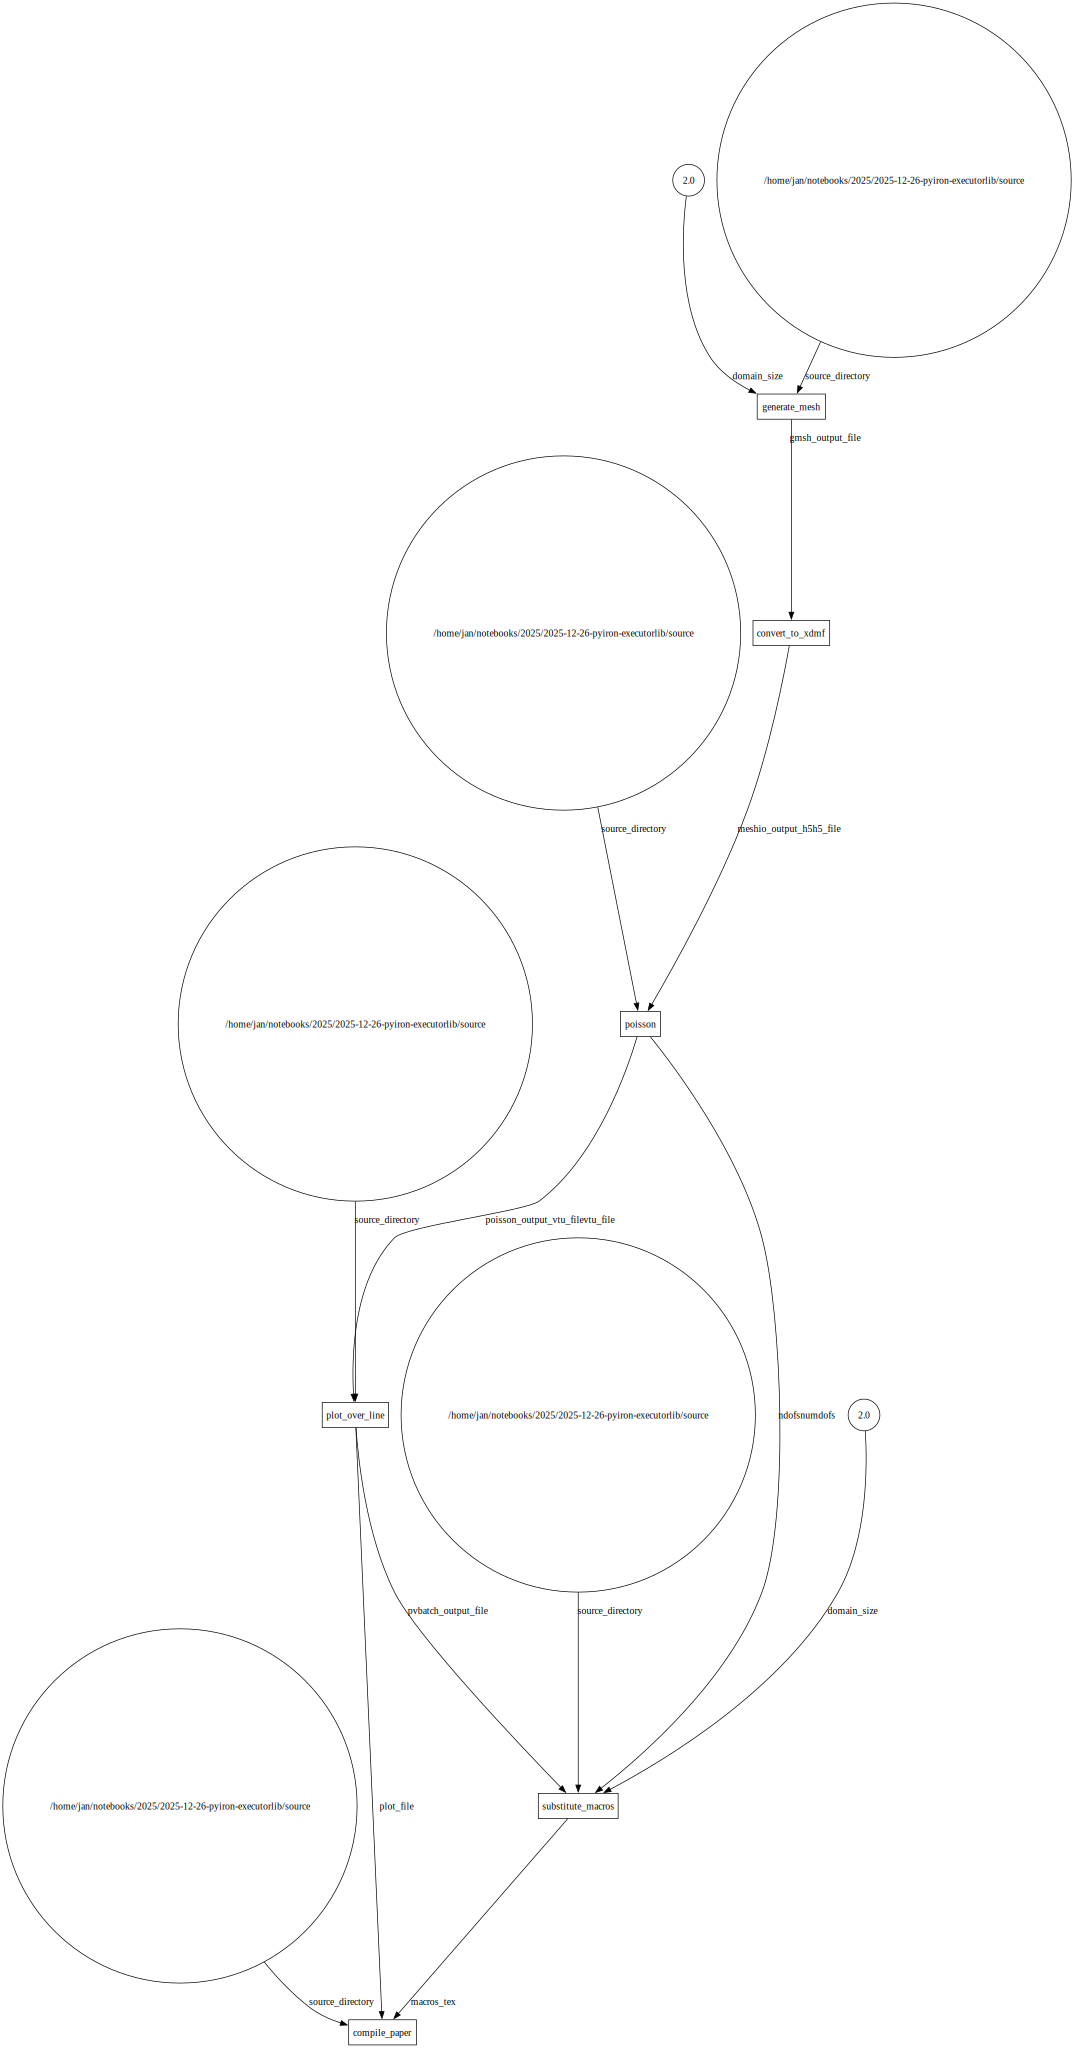

In [ ]:
domain_size = 2.0
source_directory = os.path.abspath(os.path.join(os.curdir, "source"))

with SingleNodeExecutor(export_workflow_filename=workflow_file_name) as exe:
    gmsh_output_file = exe.submit(
        generate_mesh,
        domain_size=domain_size,
        source_directory=source_directory,
    )
    meshio_output_dict = exe.submit(
        convert_to_xdmf,
        gmsh_output_file=gmsh_output_file,
    )
    poisson_dict = exe.submit(
        poisson,
        meshio_output_xdmf=get_item_from_future(meshio_output_dict, key="xdmf_file"), 
        meshio_output_h5=get_item_from_future(meshio_output_dict, key="h5_file"),
        source_directory=source_directory,
    )
    pvbatch_output_file = exe.submit(
        plot_over_line,
        poisson_output_pvd_file=get_item_from_future(poisson_dict, key="pvd_file"), 
        poisson_output_vtu_file=get_item_from_future(poisson_dict, key="vtu_file"),
        source_directory=source_directory,
    )
    macros_tex_file = exe.submit(
        substitute_macros,
        pvbatch_output_file=pvbatch_output_file, 
        ndofs=get_item_from_future(poisson_dict, key="numdofs"), 
        domain_size=domain_size,
        source_directory=source_directory,
    )
    paper_output = exe.submit(
        compile_paper,
        macros_tex=macros_tex_file, 
        plot_file=pvbatch_output_file,
        source_directory=source_directory,
    )
    task_hash_dict = exe._task_scheduler._task_hash_dict.copy()
    future_hash_dict = exe._task_scheduler._future_hash_dict.copy()

## Load Workflow with pyiron_base

In [ ]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [ ]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [ ]:
delayed_object_lst[-1].pull()

## Load Workflow with pyiron_workflwo

In [ ]:
from python_workflow_definition.pyiron_workflow import load_workflow_json

In [ ]:
wf = load_workflow_json(file_name=workflow_json_filename)

In [ ]:
wf.draw(size=(10,10))

In [ ]:
wf.run()